# Hough Transform in OpenCV
Aim to isolate the road lines.

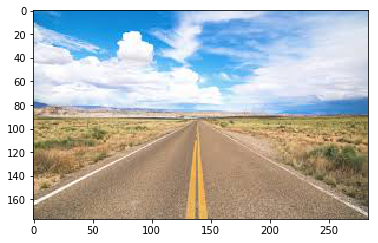

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

%matplotlib inline

image = cv2.imread('images/road.jpg')

image_copy = np.copy(image)
image_copy = cv2.cvtColor(image_copy, cv2.COLOR_BGR2RGB)

plt.imshow(image_copy)

## Edge Detection Pre-processing

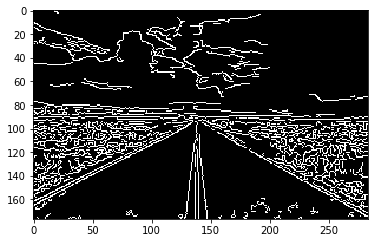

In [18]:
gray = cv2.cvtColor(image_copy, cv2.COLOR_RGB2GRAY)

low_thresh = 90
high_thresh = 180
edges = cv2.Canny(gray, low_thresh, high_thresh)

plt.imshow(edges, cmap='gray')

## Find Lines Using Hough Transform
Edge detection prodocues many discontinous partial lines, aim to join them up into continous lines.

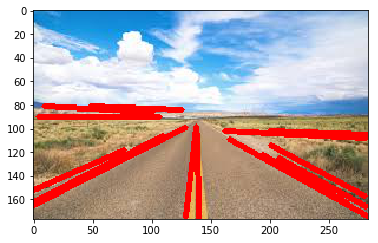

In [74]:
# hough transform parameters
# 1 pixel and 1 degree resolution
rho = 1
theta = np.pi/180
# minimum number of hough space intersections to find a line
threshold = 60
min_line_length = 60
# largest gap between discontinous line segments
max_line_gap = 7

# probabilistic hough transform
lines = cv2.HoughLinesP(edges, rho, theta, threshold,np.array([]),
                        min_line_length, max_line_gap)

line_image = np.copy(image_copy)

# iterate over lines and draw onto image
for line in lines:
    for x1,y1,x2,y2 in line:
        cv2.line(line_image, (x1,y1), (x2,y2), (255,0,0),3)
plt.imshow(line_image)

## Filter Lines by Slope

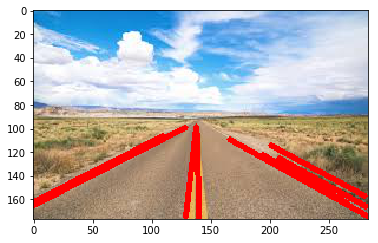

In [75]:
def line_slope(line):
    x1,y1,x2,y2 = line[0]
    return (y2-y1)/(x2-x1)

def line_slope_range(line):
    slope = line_slope(line)
    return slope > 0.5 or slope < -0.5

line_image_2 = np.copy(image_copy)

# iterate over lines and draw onto image
for line in filter(line_slope_range, lines):
    for x1,y1,x2,y2 in line:
        cv2.line(line_image_2, (x1,y1), (x2,y2), (255,0,0),3)
plt.imshow(line_image_2)